In [1]:
# 单个视频reid演示
# 效果：根据query，将对应视频中的行人框出来，并显示出来

# 步骤：
# 根据query，找到对应的视频帧索引
   # 1. 对所有视频帧进行特征提取
   # 2. 将特征存入faiss数据库
   # 3. 查找与query相似的特征
   # 4. 根据相似特征的索引，找到对应的视频帧索引

# 根据视频帧索引，找到对应的视频帧
# 播放

In [2]:
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import tqdm
import torch
import pickle
# 使用faiss向量库
import faiss
from PIL import Image

In [3]:
# 找出images下所有cam1的图片
images_list = glob.glob('./images/cam1*.jpg')

In [4]:
# 统计数量
len(images_list)

30313

In [5]:
# 提取特征
from model.REID import getImgFeat

c:\conda\envs\reid_env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
# 测试一个
getImgFeat(images_list[0]).shape

torch.Size([1, 512])

In [7]:

# 读取文件（如果再次运行，可以直接读取文件，不用再次计算特征）
with open('./weights/cam1_human_features.pickle', "rb") as f:
    data = pickle.load(f)
    human_feats = data['human_feats']
    imgs = data['imgs']

In [8]:
# 将特征转换为numpy格式
human_feats_np = human_feats.numpy()
print(human_feats_np.shape)
# 创建索引
index = faiss.IndexFlatIP(human_feats_np.shape[1])
# 添加数据
index.add(human_feats_np)
print(index.ntotal)
# save index
faiss.write_index(index, './weights/cam1.index')

# read index
index = faiss.read_index('./weights/cam1.index')

(30313, 512)
30313


In [9]:
# query
# test_img = './images/cam1_179_1342_369_1576_1184.jpg'
# test_img = './images/cam1_227_1284_335_1573_1127.jpg'
test_img = './images/cam1_9302_848_180_1009_739.jpg'

(-0.5, 160.5, 558.5, -0.5)

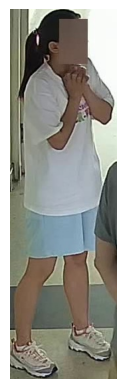

In [10]:
# display image
img = cv2.imread(test_img)
plt.imshow(img[:,:,::-1])
plt.axis('off')

In [11]:
# 查询query对应的特征
query_img = test_img
with torch.no_grad():
    feat_a = getImgFeat(query_img)
feat_a_np = feat_a.numpy()

In [13]:
feat_a_np.shape

(1, 512)

In [35]:
# 查询相似度在0.8以上的图片
threshold = 0.8
lims, D, I = index.range_search(feat_a_np, threshold) 
print(lims.shape, D.shape, I.shape)
print(lims) # 个数
print(I) # 索引
print(D) # 相似度


(2,) (69,) (69,)
[ 0 69]
[26470 26476 26488 26492 26496 26504 26554 26560 26596 26622 26710 26714
 26718 26722 26729 26734 26738 26742 26747 26767 26774 26779 26784 26789
 26794 26799 26804 26809 26814 26819 26826 26830 26834 26838 26842 26846
 26850 26854 26858 26862 26868 26872 26876 26880 26884 26888 26892 26896
 26900 26904 26910 26914 26918 26922 26926 26930 26934 26938 26942 26946
 26952 26956 26960 26964 26968 26972 27040 28227 28312]
[0.95579815 0.9597196  0.9572439  0.95343304 0.9585142  0.95070255
 0.95882404 0.9532123  0.9537574  0.9505039  0.95090264 0.9578079
 0.9521552  0.9610306  0.960534   0.96033835 0.953143   0.962818
 0.9615142  0.9545995  0.98646605 0.9831058  0.98090184 0.98928064
 0.9811584  0.9806986  0.95782214 0.97931135 0.98217136 0.9865855
 0.9937336  0.99812067 1.0000001  0.997006   0.98345536 0.98276603
 0.9858534  0.9832947  0.98154414 0.9683411  0.98546225 0.9881123
 0.98672664 0.99102366 0.9802501  0.98184377 0.98114777 0.98243046
 0.98702645 0.98858273 

In [36]:
# 根据索引I找到对应的图片
# img_list: key为图片索引，value为图片路径
img_list = {}
for idx, val in enumerate(I):
    img_list[idx] = imgs[val]

In [37]:
# 查看前10个
img_list

{0: './images\\cam1_9219_808_179_956_737.jpg',
 1: './images\\cam1_9220_807_179_955_738.jpg',
 2: './images\\cam1_9223_791_180_954_738.jpg',
 3: './images\\cam1_9224_789_180_954_738.jpg',
 4: './images\\cam1_9225_789_181_954_738.jpg',
 5: './images\\cam1_9227_792_182_954_738.jpg',
 6: './images\\cam1_9239_803_186_957_738.jpg',
 7: './images\\cam1_9240_804_186_957_738.jpg',
 8: './images\\cam1_9249_808_187_958_738.jpg',
 9: './images\\cam1_9255_807_188_958_738.jpg',
 10: './images\\cam1_9276_817_187_972_739.jpg',
 11: './images\\cam1_9277_825_185_977_739.jpg',
 12: './images\\cam1_9278_829_184_980_738.jpg',
 13: './images\\cam1_9279_830_183_982_737.jpg',
 14: './images\\cam1_9280_833_181_984_737.jpg',
 15: './images\\cam1_9281_835_181_987_737.jpg',
 16: './images\\cam1_9282_838_180_987_737.jpg',
 17: './images\\cam1_9283_840_180_989_737.jpg',
 18: './images\\cam1_9284_843_180_996_736.jpg',
 19: './images\\cam1_9289_846_179_1003_736.jpg',
 20: './images\\cam1_9290_846_179_1005_737.jpg',


In [38]:
# img_list[0] = (0, './images\\cam1_10000_1046_161_1208_697.jpg')
# 文件根据frame_id排序
# frame_id = int(img_list[0].split("_")[1])
img_list = sorted(img_list.items(), key=lambda x: int(x[1].split("_")[1]))

In [39]:
img_list

[(0, './images\\cam1_9219_808_179_956_737.jpg'),
 (1, './images\\cam1_9220_807_179_955_738.jpg'),
 (2, './images\\cam1_9223_791_180_954_738.jpg'),
 (3, './images\\cam1_9224_789_180_954_738.jpg'),
 (4, './images\\cam1_9225_789_181_954_738.jpg'),
 (5, './images\\cam1_9227_792_182_954_738.jpg'),
 (6, './images\\cam1_9239_803_186_957_738.jpg'),
 (7, './images\\cam1_9240_804_186_957_738.jpg'),
 (8, './images\\cam1_9249_808_187_958_738.jpg'),
 (9, './images\\cam1_9255_807_188_958_738.jpg'),
 (10, './images\\cam1_9276_817_187_972_739.jpg'),
 (11, './images\\cam1_9277_825_185_977_739.jpg'),
 (12, './images\\cam1_9278_829_184_980_738.jpg'),
 (13, './images\\cam1_9279_830_183_982_737.jpg'),
 (14, './images\\cam1_9280_833_181_984_737.jpg'),
 (15, './images\\cam1_9281_835_181_987_737.jpg'),
 (16, './images\\cam1_9282_838_180_987_737.jpg'),
 (17, './images\\cam1_9283_840_180_989_737.jpg'),
 (18, './images\\cam1_9284_843_180_996_736.jpg'),
 (19, './images\\cam1_9289_846_179_1003_736.jpg'),
 (20, './

In [40]:
# 根据img_list的key，重新对D和I进行排序
# 获取img_list的key
keys = []
for i in img_list:
    keys.append(i[0])

# 根据key重新排序，使用的是numpy的fancy indexing，即D[[1,2,3]]，表示取D中索引为1,2,3的元素
D_new = D[keys]
I_new = I[keys]

In [41]:
# 测试一组图片，变成视频
# 读取视频，跳转到指定帧
cap = cv2.VideoCapture('./videos/cam1.mp4')
# total frames
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
w,h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(total_frames)

for id, frame in img_list:
    frame_id = int(frame.split("_")[1])
    # ltrb
    l = int(frame.split("_")[2])
    t = int(frame.split("_")[3])
    r = int(frame.split("_")[4])
    b = int(frame.split("_")[5].split(".")[0])
    # jump to frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()
    # draw rectangle
    cv2.rectangle(frame, (l, t), (r, b), (0, 255, 0), 4)
    # draw similarity, x100再保留两位小数
    similarity = round(D_new[id]*100, 2)
    cv2.putText(frame, str(similarity) + "%", ( l, t-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    # draw frame id
    cv2.putText(frame, "frame: " + str(frame_id), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    # draw camera id
    cv2.putText(frame, "camera: " + str(1), (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    # resize to half
    frame = cv2.resize(frame, (w//2, h//2))
    cv2.imshow('frame', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# release
cap.release()
cv2.destroyAllWindows()



21720.0
